In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

In [9]:
df = pd.read_csv('../data/classification/breast_cancer_preprocessed.csv')
df.head()

Sample code number  Clump Thickness  ...  Mitoses  Class
0             1000025                5  ...        1      2
1             1002945                5  ...        1      2
2             1015425                3  ...        1      2
3             1016277                6  ...        1      2
4             1017023                4  ...        1      2

[5 rows x 11 columns]

# Аномалии:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


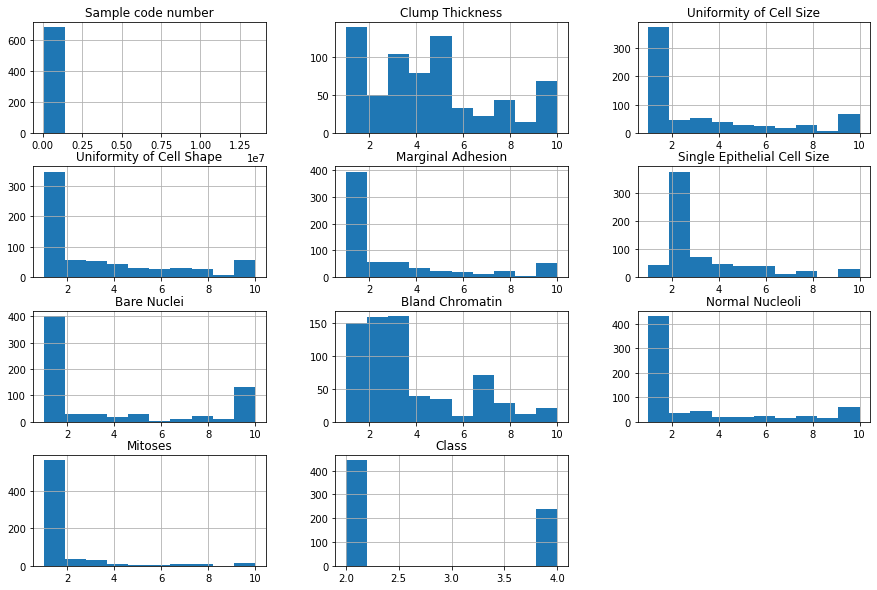

In [10]:
fig = plt.figure(figsize = (15,10))
df.hist(ax = fig.gca())
plt.show()

Из графиков видно, что аномалий нет



# Разбиение выборки

In [12]:
X = df.drop(['Class'], axis=1)
Y = df['Class']

In [13]:
X.head()

Sample code number  Clump Thickness  ...  Normal Nucleoli  Mitoses
0             1000025                5  ...                1        1
1             1002945                5  ...                2        1
2             1015425                3  ...                1        1
3             1016277                6  ...                7        1
4             1017023                4  ...                1        1

[5 rows x 10 columns]

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, shuffle = True)

In [15]:
print("X_train size: ", len(X_train))
print("Y_train size: ", len(Y_train))

print("X_test size: ", len(X_test))
print("Y_test size: ", len(Y_test))

X_train size:  478
Y_train size:  478
X_test size:  205
Y_test size:  205


In [16]:
np.std(X_train, axis=1).mean()

324058.89763546345

## Нормируем данные:

In [17]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
np.std(X_train, axis=1).mean()

0.5577313030453225

# Обучение:

## K-Nearest Neighbors

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
neigh1 = KNeighborsClassifier()
neigh1.fit(X_train, Y_train)
Y_predict = neigh1.predict(X_test)

In [36]:
print(classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

           2       0.98      0.98      0.98       131
           4       0.96      0.96      0.96        74

    accuracy                           0.97       205
   macro avg       0.97      0.97      0.97       205
weighted avg       0.97      0.97      0.97       205



## Decision Tree Classifier

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
tree = DecisionTreeClassifier()
tree.fit(X_train, Y_train)
Y_predict = tree.predict(X_test)

In [39]:
print(classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

           2       0.98      0.96      0.97       131
           4       0.93      0.96      0.95        74

    accuracy                           0.96       205
   macro avg       0.96      0.96      0.96       205
weighted avg       0.96      0.96      0.96       205



## Naive Bayes

In [40]:
from sklearn.naive_bayes import GaussianNB

In [41]:
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
Y_predict = gnb.predict(X_test)

In [42]:
print(classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

           2       0.98      0.95      0.97       131
           4       0.92      0.97      0.95        74

    accuracy                           0.96       205
   macro avg       0.95      0.96      0.96       205
weighted avg       0.96      0.96      0.96       205



## Support Vector Machines

In [43]:
from sklearn.svm import LinearSVC

In [44]:
lsvc = LinearSVC()
lsvc.fit(X_train, Y_train)
Y_predict = lsvc.predict(X_test)

In [45]:
print(classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

           2       0.98      0.98      0.98       131
           4       0.96      0.97      0.97        74

    accuracy                           0.98       205
   macro avg       0.97      0.98      0.97       205
weighted avg       0.98      0.98      0.98       205



## Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
lg = LogisticRegression()
lg.fit(X_train, Y_train)
Y_predict = lg.predict(X_test)

In [48]:
print(classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

           2       0.98      0.98      0.98       131
           4       0.96      0.97      0.97        74

    accuracy                           0.98       205
   macro avg       0.97      0.98      0.97       205
weighted avg       0.98      0.98      0.98       205



# Кросс-валидация


In [49]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5)

for train_index, test_index in skf.split(X, Y):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  Y_train, Y_test = Y[train_index], Y[test_index]

  clf = LogisticRegression(max_iter=150)
  clf.fit(X_train, Y_train)
  Y_predict = clf.predict(X_test)

  print(classification_report(Y_test, Y_predict))
  print(clf.score(X_test, Y_test))

              precision    recall  f1-score   support

           2       0.65      1.00      0.79        89
           4       0.00      0.00      0.00        48

    accuracy                           0.65       137
   macro avg       0.32      0.50      0.39       137
weighted avg       0.42      0.65      0.51       137

0.6496350364963503
              precision    recall  f1-score   support

           2       0.99      0.87      0.92        89
           4       0.80      0.98      0.88        48

    accuracy                           0.91       137
   macro avg       0.89      0.92      0.90       137
weighted avg       0.92      0.91      0.91       137

0.9051094890510949
              precision    recall  f1-score   support

           2       0.65      1.00      0.79        89
           4       0.00      0.00      0.00        48

    accuracy                           0.65       137
   macro avg       0.32      0.50      0.39       137
weighted avg       0.42      0.65   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

# Подбор гиперпараметров

Подберем гиперпараметры для KNN

In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
param_grid1 = {'n_neighbors': [i for i in range(1, 15)],
               'weights': ['uniform', 'distance'],
               'algorithm': ['ball_tree', 'kd_tree', 'brute'] }

In [52]:
n_gs = GridSearchCV(neigh1, param_grid1)

In [54]:
n_gs.fit(X_train, Y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [55]:
GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [56]:
n_gs.best_estimator_

KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [57]:
 KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [58]:
 n_gs.best_score_

0.5245871559633029

In [59]:
n_gs.best_params_

{'algorithm': 'ball_tree', 'n_neighbors': 2, 'weights': 'uniform'}